In [1]:
# Import pandas 
import pandas as pd 
import os
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt


current_path = os.getcwd()
current_path

'C:\\Users\\owner\\shubham\\projects\\notebooks'

In [2]:
train_dataset = os.path.join(current_path,'facedataset','training.csv')
test_dataset = os.path.join(current_path,'facedataset','test.csv')

# reading csv file  
df = pd.read_csv(train_dataset) 
df.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   
1          64.332936          34.970077           29.949277   
2          65.057053          34.909642           30.903789   
3          65.225739          37.261774           32.023096   
4          66.725301          39.621261           32.244810   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   
1           33.448715                58.856170                35.274349   
2           34.909642                59.412000                36.320968   
3           37.261774                60.003339                39.127179   
4           38.042032                58.565890                39.621261   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   
1                70.722723                36.187166                 36.034723   
2                70.984421                36.320968                 37.678105   
3                72.314713                38.380967                 37.618643   
4                72.515926                39.884466                 36.982380   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 37.389402  ...   57.066803            61.195308   
1                 34.361532  ...   55.660936            56.421447   
2                 36.320968  ...   53.538947            60.822947   
3                 38.754115  ...   54.166539            65.598887   
4                 39.094852  ...   64.889521            60.671411   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            79.970165             28.614496             77.388992   
1            76.352000             35.122383             76.047660   
2            73.014316             33.726316             72.732000   
3            72.703722             37.245496             74.195478   
4            77.523239             31.191755             76.997301   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               43.312602               72.935459                  43.130707   
1               46.684596               70.266553                  45.467915   
2               47.274947               70.191789                  47.274947   
3               50.303165               70.091687                  51.561183   
4               44.962748               73.707387                  44.227141   

   mouth_center_bottom_lip_y  \
0                  84.485774   
1                  85.480170   
2                  78.659368   
3                  78.268383   
4                  86.871166   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  
1  219 215 204 196 204 211 212 200 180 168 178 19...  
2  144 142 159 180 188 188 184 180 167 132 84 59 ...  
3  193 192 193 194 194 194 193 192 168 111 50 12 ...  
4  147 148 160 196 215 214 216 217 219 220 206 18...  

[5 rows x 31 columns]

In [3]:
def string2image(string):
    """Converts a string to a numpy array."""
    return np.array([int(item) for item in string.split()]).reshape((96, 96))

def plot_faces(nrows=5, ncols=5):
    """Randomly displays some faces from the training data."""
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['Image']
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, ax in zip(image_strings, axes.ravel()):
        ax.imshow(string2image(string), cmap='gray')
        ax.axis('off')

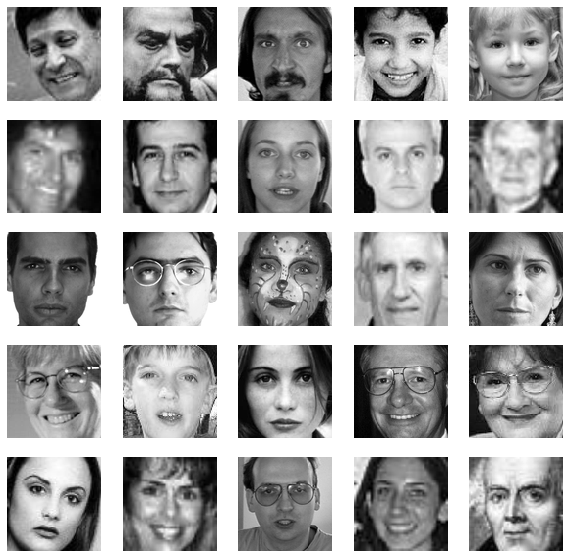

In [4]:
plot_faces()


In [5]:
keypoint_cols = list(df.columns)[:-1]

In [6]:
keypoint_cols


['left_eye_center_x',
 'left_eye_center_y',
 'right_eye_center_x',
 'right_eye_center_y',
 'left_eye_inner_corner_x',
 'left_eye_inner_corner_y',
 'left_eye_outer_corner_x',
 'left_eye_outer_corner_y',
 'right_eye_inner_corner_x',
 'right_eye_inner_corner_y',
 'right_eye_outer_corner_x',
 'right_eye_outer_corner_y',
 'left_eyebrow_inner_end_x',
 'left_eyebrow_inner_end_y',
 'left_eyebrow_outer_end_x',
 'left_eyebrow_outer_end_y',
 'right_eyebrow_inner_end_x',
 'right_eyebrow_inner_end_y',
 'right_eyebrow_outer_end_x',
 'right_eyebrow_outer_end_y',
 'nose_tip_x',
 'nose_tip_y',
 'mouth_left_corner_x',
 'mouth_left_corner_y',
 'mouth_right_corner_x',
 'mouth_right_corner_y',
 'mouth_center_top_lip_x',
 'mouth_center_top_lip_y',
 'mouth_center_bottom_lip_x',
 'mouth_center_bottom_lip_y']

In [7]:
xy = df.iloc[0][keypoint_cols].values.reshape((15, 2))
xy 

array([[66.0335639098, 39.0022736842],
       [30.2270075188, 36.4216781955],
       [59.582075188000005, 39.647422556399995],
       [73.1303458647, 39.9699969925],
       [36.3565714286, 37.3894015038],
       [23.4528721805, 37.3894015038],
       [56.9532631579, 29.0336481203],
       [80.2271278195, 32.2281383459],
       [40.2276090226, 29.0023218045],
       [16.3563789474, 29.6474706767],
       [44.4205714286, 57.0668030075],
       [61.1953082707, 79.9701654135],
       [28.6144962406, 77.38899248119999],
       [43.3126015038, 72.9354586466],
       [43.1307067669, 84.4857744361]], dtype=object)

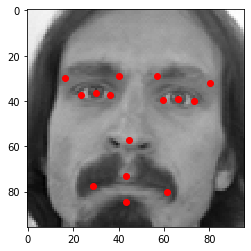

In [8]:
plt.plot(xy[:, 0], xy[:, 1], 'ro')
plt.imshow(string2image(df.iloc[0]['Image']), cmap='gray')

In [9]:
def plot_faces_with_keypoints(nrows=5, ncols=5):
    """Randomly displays some faces from the training data with their keypoints."""
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['Image']
    keypoint_cols = list(df.columns)[:-1]
    keypoints = df.loc[selection][keypoint_cols]
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, (iloc, keypoint), ax in zip(image_strings, keypoints.iterrows(), axes.ravel()):
        xy = keypoint.values.reshape((15, 2))
        ax.imshow(string2image(string), cmap='gray')
        ax.plot(xy[:, 0], xy[:, 1], 'ro')
        ax.axis('off')

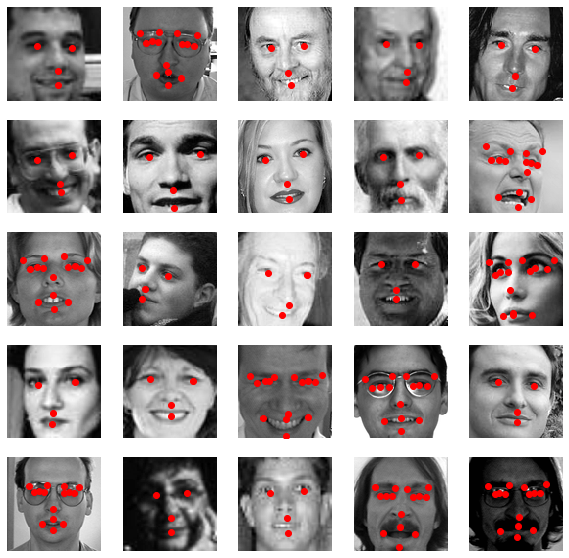

In [10]:
plot_faces_with_keypoints()

In [11]:
fully_annotated = df.dropna()


In [12]:
fully_annotated.shape


(2140, 31)

In [13]:
X = np.stack([string2image(string) for string in fully_annotated['Image']]).astype(np.float)[:, :, :]



In [14]:
y = np.vstack(fully_annotated[fully_annotated.columns[:-1]].values)


In [15]:
X.shape


(2140, 96, 96)

In [16]:
y.shape
print(y[0])
# np.savetxt('y.txt', y, delimiter=',')   # X is an array

[66.03356391 39.00227368 30.22700752 36.4216782  59.58207519 39.64742256
 73.13034586 39.96999699 36.35657143 37.3894015  23.45287218 37.3894015
 56.95326316 29.03364812 80.22712782 32.22813835 40.22760902 29.0023218
 16.35637895 29.64747068 44.42057143 57.06680301 61.19530827 79.97016541
 28.61449624 77.38899248 43.3126015  72.93545865 43.13070677 84.48577444]


In [17]:
X_train = X / 255


In [18]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)

Y = output_pipe.fit_transform(y)


In [19]:
train_image = X[:2001]
test_image = X[2001:]

train_image = train_image/255
test_image = test_image/255
print(train_image.shape)
print(test_image.shape)
print(train_image[1])


(2001, 96, 96)
(139, 96, 96)
[[0.85882353 0.84313725 0.8        ... 0.36078431 0.34509804 0.32941176]
 [0.87058824 0.85882353 0.8627451  ... 0.36078431 0.34509804 0.3372549 ]
 [0.90588235 0.87843137 0.83137255 ... 0.30196078 0.31372549 0.32941176]
 ...
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]]


In [20]:
train_label = Y[:2001]
test_label = Y[2001:]

print(train_label.shape)
print(test_label.shape)
train_label[1]

(2001, 30)
(139, 30)


array([ 0.09334934, -0.00113295, -0.06444905, -0.18184834,  0.2536345 ,
       -0.19158372,  0.04301149, -0.1508095 ,  0.02860416, -0.12953929,
       -0.07451062, -0.43588804,  0.14426598,  0.01633495,  0.19236915,
        0.0382782 ,  0.34667375, -0.15802335, -0.2725703 , -0.12533216,
        0.16321568, -0.18090257, -0.38617651,  0.02674886,  0.23044622,
        0.05338166, -0.02354529, -0.27158625, -0.15480756,  0.46450493])

In [21]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras


print(tf.VERSION)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


In [181]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(96,96,1)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.softmax)
])

In [182]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['accuracy'])

In [171]:
X_train.shape
X_train.shape


(2140, 96, 96)

In [207]:

model.fit(train_image.reshape(2001,96,96,1), train_label, epochs=20, batch_size=50)


Epoch 1/20
2001/2001 [==============================] - 4s 2ms/sample - loss: 0.0495 - acc: 0.6947
Epoch 2/20
2001/2001 [==============================] - 4s 2ms/sample - loss: 0.0496 - acc: 0.6492
Epoch 3/20
2001/2001 [==============================] - 5s 2ms/sample - loss: 0.0494 - acc: 0.6907
Epoch 4/20
2001/2001 [==============================] - 5s 2ms/sample - loss: 0.0493 - acc: 0.7071
Epoch 5/20
2001/2001 [==============================] - 5s 2ms/sample - loss: 0.0494 - acc: 0.6842
Epoch 6/20
2001/2001 [==============================] - 4s 2ms/sample - loss: 0.0492 - acc: 0.7146
Epoch 7/20
2001/2001 [==============================] - 5s 3ms/sample - loss: 0.0491 - acc: 0.7231
Epoch 8/20
2001/2001 [==============================] - 5s 3ms/sample - loss: 0.0490 - acc: 0.7446
Epoch 9/20
2001/2001 [==============================] - 5s 3ms/sample - loss: 0.0490 - acc: 0.7476
Epoch 10/20
2001/2001 [==============================] - 5s 3ms/sample - loss: 0.0489 - acc: 0.7341
Epoch 11/

In [208]:
test_loss, test_acc = model.evaluate(test_image.reshape(139,96,96,1), test_label)

print('Test accuracy:', test_acc)

139/139 [==============================] - 0s 649us/sample - loss: 0.0690 - acc: 0.2950
Test accuracy: 0.29496402


In [209]:
img = train_image[0]
img = np.reshape(img, [1,96, 96,1])
predictions = model.predict(img)

predictions

array([[5.5483576e-02, 1.9791654e-01, 1.9843549e-07, 8.1413481e-03,
        1.7644635e-01, 3.4849950e-08, 4.4704840e-02, 1.3344751e-08,
        2.5950401e-08, 3.9429449e-02, 1.2982199e-08, 3.0192942e-07,
        9.9858277e-02, 3.2348819e-03, 1.3362023e-01, 5.1620771e-07,
        1.8742630e-05, 1.7485830e-03, 1.5507209e-06, 1.3215684e-06,
        1.6200398e-04, 1.6246975e-07, 9.5090286e-07, 8.5338385e-08,
        7.3906541e-04, 2.4945322e-07, 7.2544890e-07, 1.5908050e-06,
        3.7746561e-06, 2.3848465e-01]], dtype=float32)

In [210]:
predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
predictions

array([[63.76159 , 37.189423],
       [30.708893, 35.463356],
       [57.80473 , 37.19021 ],
       [70.75158 , 37.951923],
       [35.703186, 35.936092],
       [25.55278 , 38.26188 ],
       [53.273098, 28.115906],
       [77.49683 , 29.672884],
       [38.180695, 27.98101 ],
       [21.751188, 29.041227],
       [44.87943 , 58.77557 ],
       [64.31832 , 75.84844 ],
       [30.390966, 75.066696],
       [47.03242 , 75.317726],
       [47.742905, 81.12062 ]], dtype=float32)

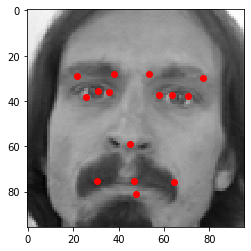

In [211]:
plt.imshow(train_image[0], cmap='gray')
plt.plot(predictions[:, 0], predictions[:, 1], 'ro')

In [212]:
import numpy as np
import cv2 as cv
from PIL import Image
import imutils

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')


In [213]:
img_ori = cv.imread('test_face.jpg')
gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    just_face_img = cv.resize(gray[y:y+h,x:x+w], (96,96))
    cv.rectangle(img_ori,(x,y),(x+w,y+h),(255,0,0),1)
    print(just_face.size)
    print(just_face.shape)
    just_face = np.reshape(just_face_img, [1,96, 96,1])
    predictions = model.predict(just_face)

predictions

9216
(1, 96, 96, 1)


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.8625624e-13, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [214]:
predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
predictions.shape

(15, 2)

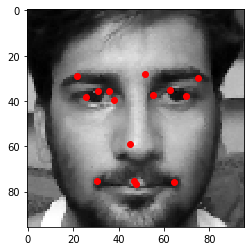

In [215]:
plt.imshow(just_face_img, cmap='gray')
plt.plot(predictions[:, 0], predictions[:, 1], 'ro')

In [216]:
model.save('facial_points.h5')